# Imports

In [1]:
from mask_to_submission import *
from submission_to_mask import *
from helpers import *

import numpy as np

import cv2 as cv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

from PIL import Image

%load_ext autoreload
%autoreload 2

# Exploratory data analysis

## Training images and ground truth
#### Just a peek at what the data looks like

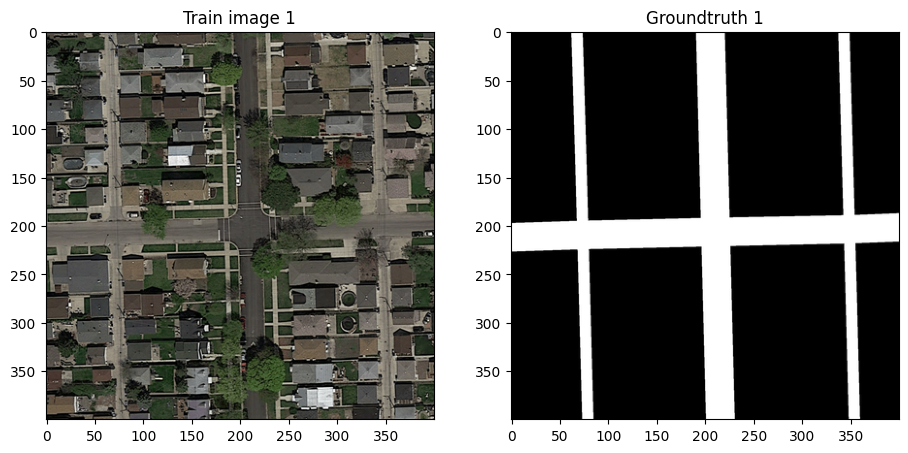

In [3]:
rcParams['figure.figsize'] = 11, 8

img_train_1 = mpimg.imread('training/images/satImage_001.png')
img_gt_1 = mpimg.imread('training/groundtruth/satImage_001.png')

fig, ax = plt.subplots(1,2)

ax[0].imshow(img_train_1)
ax[0].title.set_text('Train image 1')
ax[1].imshow(img_gt_1, cmap="gray")
ax[1].title.set_text('Groundtruth 1')

# Data augmentation

## Split image into patches

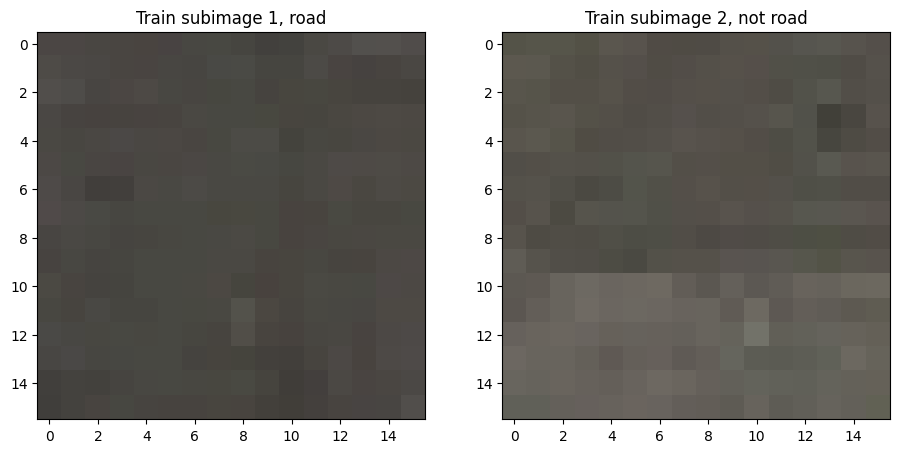

In [4]:
sub_image_1 = img_train_1[200:216, 200:216]
sub_image_2 = img_train_1[240:256, 260:276]
fig, ax = plt.subplots(1,2)

ax[0].imshow(sub_image_1)
ax[0].title.set_text('Train subimage 1, road')
ax[1].imshow(sub_image_2)
ax[1].title.set_text('Train subimage 2, not road')

#### Basically we cannot train on independent 16x16 images, we need to train on the whole image/a bigger patch.

#### We can split images into patches of a smaller size

In [5]:
#See function split_into_patches(img, patchsize) in helpers.py

#### Demonstration

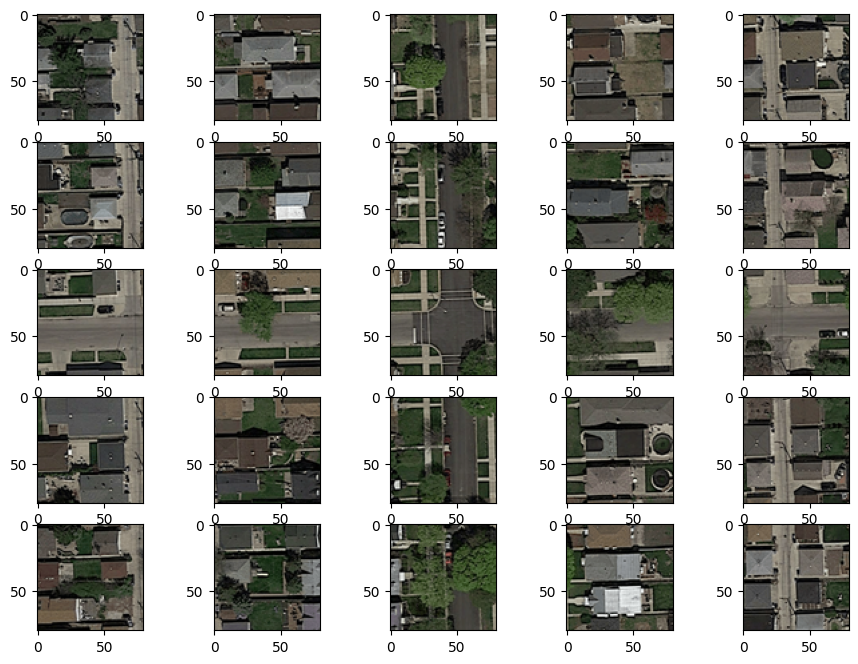

In [6]:
patchsize = 80
img_train_1_splitted = split_into_patches(img_train_1, patchsize)

fig, ax = plt.subplots(5,5) # Works for patchsize = 80 and images 400x400
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(img_train_1_splitted[5*i + j])

#### Same can be applied to ground truth

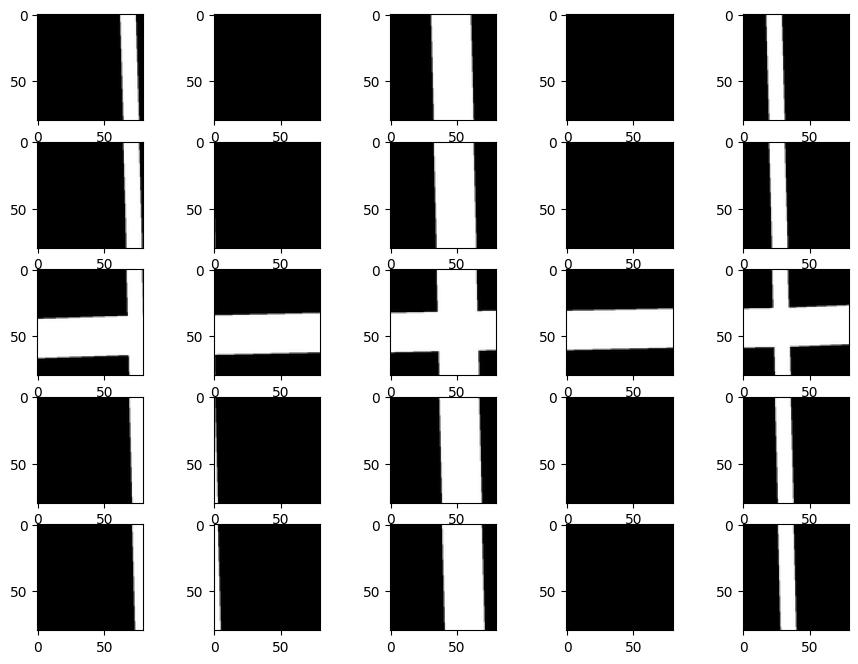

In [7]:
patchsize = 80
img_gt_1_splitted = split_into_patches(img_gt_1, patchsize)

fig, ax = plt.subplots(5,5) # Works for patchsize = 80 and images 400x400
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(img_gt_1_splitted[5*i + j], cmap="gray")

### Random patches

In [8]:
#See function split_into_random_n_patches(img, n, patchsize, tlcs=[]) in helpers.py

#### Demonstration

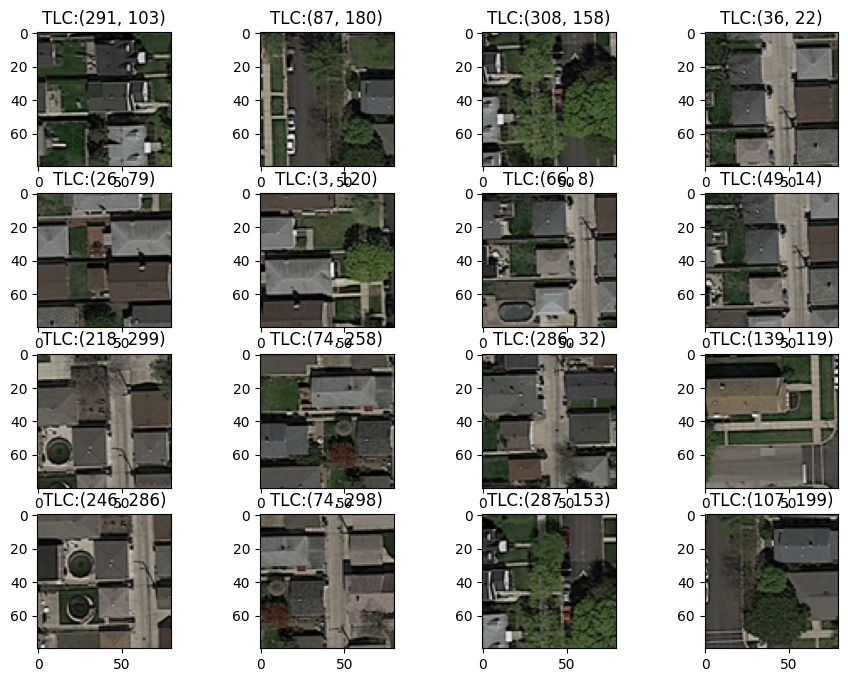

In [9]:
patchsize = 80
num_samples = 16
# This is an image --> tlcs is *not* specified
img_train_1_splitted_random, tlcs_img_train_1 = split_into_random_n_patches(img_train_1, num_samples, patchsize)

fig, ax = plt.subplots(4, 4) # Works for num_samples = 16
for i in range(4):
    for j in range(4):
        ax[i,j].title.set_text("TLC:" + str(tlcs_img_train_1[4*i + j]))
        ax[i,j].imshow(img_train_1_splitted_random[4*i + j])

#### Ground truth can be computed using optional argument

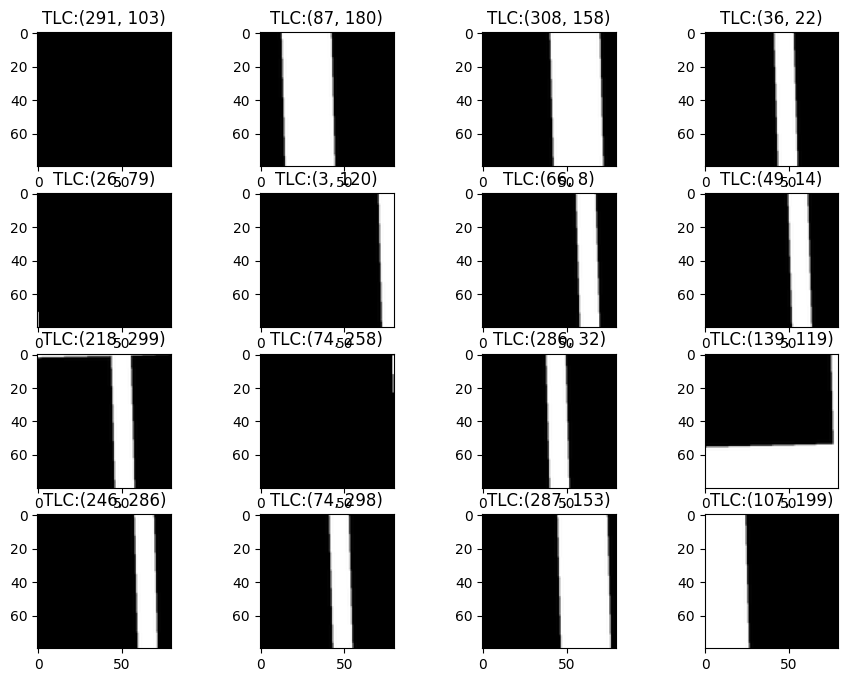

In [10]:
patchsize = 80
num_samples = 16
# This is grouth truth --> tlcs is specified with the corresponding image
img_gt_1_splitted_random, tlcs_img_gt_1 = split_into_random_n_patches(img_gt_1, num_samples, patchsize, tlcs_img_train_1)

fig, ax = plt.subplots(4, 4) # Works for num_samples = 16
for i in range(4):
    for j in range(4):
        ax[i,j].title.set_text("TLC:" + str(tlcs_img_gt_1[4*i + j]))
        ax[i,j].imshow(img_gt_1_splitted_random[4*i + j], cmap = "gray")

## Rotate images

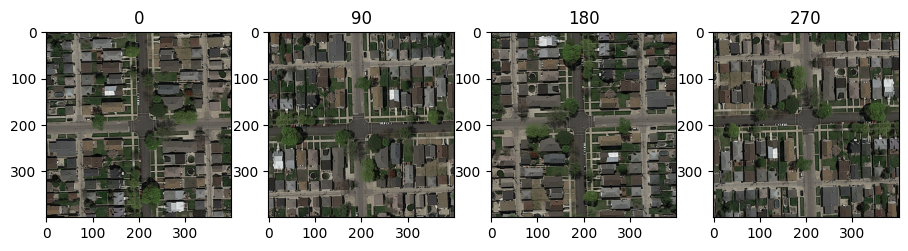

In [11]:
img_train_1_rotations = get_rotations_0_90_180_270(img_train_1)

fig, ax = plt.subplots(1,4)

for i in range(1,5):
    ax[i-1].title.set_text(str((i-1)*90))
    ax[i-1].imshow(img_train_1_rotations[i-1])

### Rotated images with other angles

(400, 400, 3)


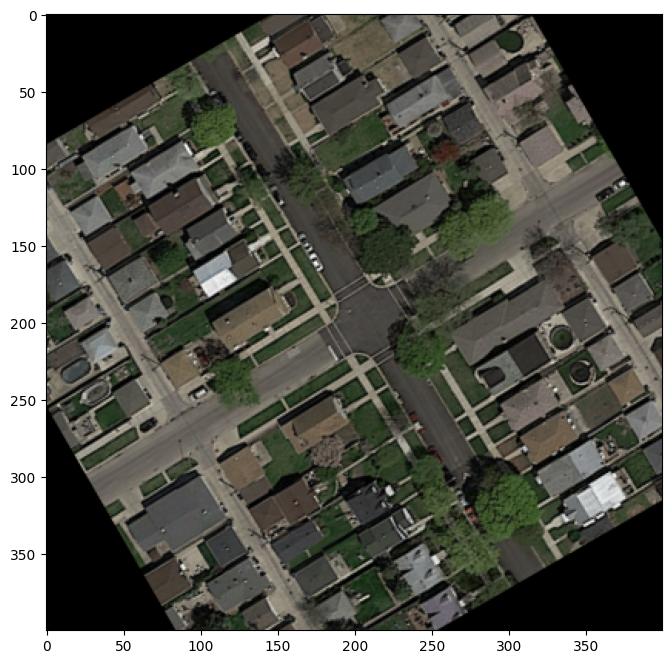

In [27]:
image = mpimg.imread('training/images/satImage_001.png')
h, w = image.shape[:2]
cX, cY = w // 2, h // 2
M = cv.getRotationMatrix2D((cX, cY), 30, 1.0)
rotated = cv.warpAffine(image, M, (w, h))
plt.imshow(rotated)
print(rotated.shape)